## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn 
%matplotlib inline
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

## Reading Data

In [3]:
# General employees' information
general = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Stuff\\Big Data\\Python\\HR analysis\\general_data.csv")
general.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   int64  
 1   Attrition                1000 non-null   object 
 2   BusinessTravel           1000 non-null   object 
 3   Department               1000 non-null   object 
 4   DistanceFromHome         1000 non-null   int64  
 5   Education                1000 non-null   int64  
 6   EducationField           1000 non-null   object 
 7   EmployeeCount            1000 non-null   int64  
 8   EmployeeID               1000 non-null   int64  
 9   Gender                   1000 non-null   object 
 10  JobLevel                 1000 non-null   int64  
 11  JobRole                  1000 non-null   object 
 12  MaritalStatus            1000 non-null   object 
 13  MonthlyIncome            1000 non-null   int64  
 14  NumCompaniesWorked       

In [5]:
general.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,993.000000,1000.000000,1000.0,1000.000000,996.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,36.801000,9.23400,2.929000,1.0,500.500000,2.048000,64519.160000,2.686808,15.192000,8.0,0.812000,11.349398,2.826000,7.017000,2.205000,4.070000
std,9.189987,8.14614,1.003477,0.0,288.819436,1.103138,46577.275011,2.495883,3.657118,0.0,0.864525,7.965529,1.310512,6.141533,3.248311,3.559462
min,18.000000,1.00000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.00000,2.000000,1.0,250.750000,1.000000,28620.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,35.000000,7.00000,3.000000,1.0,500.500000,2.000000,49220.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.00000,4.000000,1.0,750.250000,3.000000,83360.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.00000,5.000000,1.0,1000.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,36.000000,15.000000,17.000000


In [6]:
# Employees' satisfaction survey data
survey = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Stuff\\Big Data\\Python\\HR analysis\\employee_survey_data.csv")
survey.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


## First look at the Data

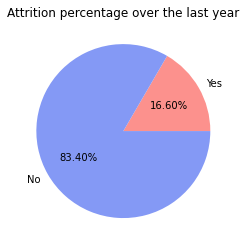

In [7]:
attrition_yes = general.loc[general["Attrition"] == "Yes"].count()[0]
attrition_no = general.loc[general["Attrition"] == "No"].count()[0]

labels = ["Yes", "No"]
colors = ["#fc918d", "#8499f5"]
plt.pie([attrition_yes, attrition_no], labels = labels, colors = colors, autopct = "%.2f%%")

plt.title("Attrition percentage over the last year")

plt.show()

In [7]:
general.groupby("Attrition").mean()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,
No,37.523981,9.170264,2.937650,1.0,499.941247,2.051559,65363.956835,2.648551,15.158273,8.0,0.803357,11.956679,2.859712,7.366906,2.227818,4.303357
Yes,33.168675,9.554217,2.885542,1.0,503.307229,2.030120,60274.819277,2.878788,15.361446,8.0,0.855422,8.290909,2.656627,5.259036,2.090361,2.897590


##### By looking into the averages based on Attrition we can see noticeable differences in some of the variables. From the table above it looks like on average younger employees are more likely to leave the company. Moreover, lower monthly income might also have an impact, as we can see that monthly income of those who have left the company is on average lower than of those who did not leave. Also, employees with shorter total working years as well as with shorter years at the company might have a tendency to leave the company, as average Total Working Years and average Years At Company of those who have left are lower, than of those who stayed at the company. Therefore, these features should be looked into further, as they might have a great impact on the attrition.

## Cleaning Data

### General info data set

In [8]:
general.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         7
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          4
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [9]:
general["Over18"].unique()

array(['Y'], dtype=object)

In [10]:
general["EmployeeCount"].unique()

array([1], dtype=int64)

In [11]:
general["StandardHours"].unique()

array([8], dtype=int64)

In [12]:
# Dropping columns "Over 18" "EmployeeCount" and "StandardHours" as they have only one value
general.drop(columns=["Over18", "EmployeeCount", "StandardHours"], axis=1, inplace=True)

In [13]:
# Deleting rows with null values in column "TotalWorkingYears"
general.dropna(axis=0, subset=["TotalWorkingYears"], inplace=True)

In [14]:
# Filling in all null values in the column "NumCompaniesWorked" with 2 (as Mean = 2.65 and Median = 2)
general.fillna({"NumCompaniesWorked": 2}, inplace=True)

In [15]:
# All null values have been cleaned out
general.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [16]:
# Decoding values
general["Education"] = general["Education"].replace({1:"Below College", 2:"College", 3:"Bachelor", 4:"Master", 5:"Doctor"})

In [17]:
# Changing data type for column "JobLevel"
general["JobLevel"] = general["JobLevel"].astype("object")

In [18]:
general.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,College,Life Sciences,1,Female,1,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,2,Female,1,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,Master,Other,3,Male,4,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,4,Male,3,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,Below College,Medical,5,Male,1,...,Single,23420,4.0,12,2,9.0,2,6,0,4


### Survey info data set

In [19]:
survey.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [20]:
survey.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,1000.000000,991.000000,995.000000,993.000000
mean,500.500000,2.733602,2.715578,2.765358
std,288.819436,1.103562,1.100808,0.717247
min,1.000000,1.000000,1.000000,1.000000
25%,250.750000,2.000000,2.000000,2.000000
50%,500.500000,3.000000,3.000000,3.000000
75%,750.250000,4.000000,4.000000,3.000000
max,1000.000000,4.000000,4.000000,4.000000


In [21]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               1000 non-null   int64  
 1   EnvironmentSatisfaction  991 non-null    float64
 2   JobSatisfaction          995 non-null    float64
 3   WorkLifeBalance          993 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [22]:
# Decoding values
survey["EnvironmentSatisfaction"] = survey["EnvironmentSatisfaction"].replace({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
survey["JobSatisfaction"] = survey["JobSatisfaction"].replace({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
survey["WorkLifeBalance"] = survey["WorkLifeBalance"].replace({1:"Bad", 2:"Good", 3:"Better", 4:"Best"})

In [23]:
# From statistical information table we know that mean for EnvironmentSatisfaction field is 2.709. Therefore, we can change null values to "High" as it corresponds to value 3.
survey["EnvironmentSatisfaction"] = survey["EnvironmentSatisfaction"].fillna("High")
# From statistical information table we know that mean for JobSatisfaction field is 2.702. Therefore, we can change null values to "High" as it corresponds to value 3.
survey["JobSatisfaction"] = survey["JobSatisfaction"].fillna("High")
# From statistical information table we know that mean for WorkLifeBalance field is 2.746 Therefore, we can change null values to "Better" as it corresponds to value 3.
survey["WorkLifeBalance"] = survey["WorkLifeBalance"].fillna("Better")
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1000 non-null   int64 
 1   EnvironmentSatisfaction  1000 non-null   object
 2   JobSatisfaction          1000 non-null   object
 3   WorkLifeBalance          1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [27]:
survey.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,High,Very High,Good
1,2,High,Medium,Best
2,3,Medium,Medium,Bad
3,4,Very High,Very High,Better
4,5,Very High,Low,Better


## In Time data set

In [28]:
in_time = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Stuff\\Big Data\\Python\\HR analysis\\in_time.csv")
in_time.head(5)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [29]:
in_time.rename(columns={"Unnamed: 0":"EmployeeID"}, inplace=True)
in_time.head(3)

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39


In [30]:
# Transposing columns to have a pivot table with dates added to rows in the table.
in_time_data = in_time.set_index("EmployeeID").stack().reset_index()
in_time_data.rename(columns={"level_1":"Date_IN", 0:"Date_time_IN"}, inplace=True)
in_time_data.head(5)

,EmployeeID,Date_IN,Date_time_IN
0,1,2015-01-02,2015-01-02 09:43:45
1,1,2015-01-05,2015-01-05 10:08:48
2,1,2015-01-06,2015-01-06 09:54:26
3,1,2015-01-07,2015-01-07 09:34:31
4,1,2015-01-08,2015-01-08 09:51:09


In [31]:
in_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236298 entries, 0 to 236297
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   EmployeeID    236298 non-null  int64 
 1   Date_IN       236298 non-null  object
 2   Date_time_IN  236298 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.4+ MB


In [32]:
# Changing data type to have a date format
in_time_data["Date_IN"] = pd.to_datetime(in_time_data["Date_IN"])
in_time_data["Date_time_IN"] = pd.to_datetime(in_time_data["Date_time_IN"])
in_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236298 entries, 0 to 236297
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   EmployeeID    236298 non-null  int64         
 1   Date_IN       236298 non-null  datetime64[ns]
 2   Date_time_IN  236298 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 5.4 MB


## Out Time data set

In [33]:
out_time = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Stuff\\Big Data\\Python\\HR analysis\\out_time.csv")
out_time.head(5)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [34]:
out_time.rename(columns={"Unnamed: 0":"EmployeeID"}, inplace=True)
out_time.head(3)

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50


In [35]:
# Transposing columns to have a pivot table with dates added to rows in the table
out_time_data = out_time.set_index("EmployeeID").stack().reset_index()
out_time_data.rename(columns={"level_1":"Date_OUT", 0:"Date_time_OUT"}, inplace=True)
out_time_data.head(5)

,EmployeeID,Date_OUT,Date_time_OUT
0,1,2015-01-02,2015-01-02 16:56:15
1,1,2015-01-05,2015-01-05 17:20:11
2,1,2015-01-06,2015-01-06 17:19:05
3,1,2015-01-07,2015-01-07 16:34:55
4,1,2015-01-08,2015-01-08 17:08:32


In [36]:
out_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236298 entries, 0 to 236297
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   EmployeeID     236298 non-null  int64 
 1   Date_OUT       236298 non-null  object
 2   Date_time_OUT  236298 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.4+ MB


In [37]:
# Changing data type to have a date format
out_time_data["Date_OUT"] = pd.to_datetime(out_time_data["Date_OUT"])
out_time_data["Date_time_OUT"] = pd.to_datetime(out_time_data["Date_time_OUT"])
out_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236298 entries, 0 to 236297
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   EmployeeID     236298 non-null  int64         
 1   Date_OUT       236298 non-null  datetime64[ns]
 2   Date_time_OUT  236298 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 5.4 MB


## Calculating average working hours

In [38]:
# Merging IN and OUT times information
in_out_time = pd.merge(in_time_data, out_time_data, how="left", left_on=["EmployeeID", "Date_IN"], right_on=["EmployeeID", "Date_OUT"])
in_out_time.head(5)

,EmployeeID,Date_IN,Date_time_IN,Date_OUT,Date_time_OUT
0,1,2015-01-02,2015-01-02 09:43:45,2015-01-02,2015-01-02 16:56:15
1,1,2015-01-05,2015-01-05 10:08:48,2015-01-05,2015-01-05 17:20:11
2,1,2015-01-06,2015-01-06 09:54:26,2015-01-06,2015-01-06 17:19:05
3,1,2015-01-07,2015-01-07 09:34:31,2015-01-07,2015-01-07 16:34:55
4,1,2015-01-08,2015-01-08 09:51:09,2015-01-08,2015-01-08 17:08:32


In [39]:
# Calculating working time
in_out_time["working_hours"] = (in_out_time["Date_time_OUT"] - in_out_time["Date_time_IN"]).astype("timedelta64[s]")/3600
in_out_time.head(5)

,EmployeeID,Date_IN,Date_time_IN,Date_OUT,Date_time_OUT,working_hours
0,1,2015-01-02,2015-01-02 09:43:45,2015-01-02,2015-01-02 16:56:15,7.208333
1,1,2015-01-05,2015-01-05 10:08:48,2015-01-05,2015-01-05 17:20:11,7.189722
2,1,2015-01-06,2015-01-06 09:54:26,2015-01-06,2015-01-06 17:19:05,7.410833
3,1,2015-01-07,2015-01-07 09:34:31,2015-01-07,2015-01-07 16:34:55,7.006667
4,1,2015-01-08,2015-01-08 09:51:09,2015-01-08,2015-01-08 17:08:32,7.289722


In [40]:
# Calculating average employees' working hours
average_working_hours = in_out_time.groupby(["EmployeeID"]).mean()
average_working_hours

,working_hours
EmployeeID,
1,7.373651
2,7.718969
3,7.013240
4,7.193678
5,8.006175
...,...
996,7.386260
997,7.697562
998,8.278269


In [41]:
average_working_hours.rename(columns={"working_hours":"AverageWorkingHours"}, inplace=True)
average_working_hours

,AverageWorkingHours
EmployeeID,
1,7.373651
2,7.718969
3,7.013240
4,7.193678
5,8.006175
...,...
996,7.386260
997,7.697562
998,8.278269


## Merging data sets 

In [42]:
general_survey = pd.merge(general, survey, how="left", on=["EmployeeID"])

# Adding average working hours to the data set
data = pd.merge(general_survey, average_working_hours, how="left", on=["EmployeeID"])

data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AverageWorkingHours
0,51,No,Travel_Rarely,Sales,6,College,Life Sciences,1,Female,1,...,0,1.0,6,1,0,0,High,Very High,Good,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,2,Female,1,...,1,6.0,3,5,1,4,High,Medium,Best,7.718969
2,32,No,Travel_Frequently,Research & Development,17,Master,Other,3,Male,4,...,3,5.0,2,5,0,3,Medium,Medium,Bad,7.013240
3,38,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,4,Male,3,...,3,13.0,5,8,7,5,Very High,Very High,Better,7.193678
4,32,No,Travel_Rarely,Research & Development,10,Below College,Medical,5,Male,1,...,2,9.0,2,6,0,4,Very High,Low,Better,8.006175


In [46]:
data.info()
#data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 995
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      996 non-null    int64  
 1   Attrition                996 non-null    object 
 2   BusinessTravel           996 non-null    object 
 3   Department               996 non-null    object 
 4   DistanceFromHome         996 non-null    int64  
 5   Education                996 non-null    object 
 6   EducationField           996 non-null    object 
 7   EmployeeID               996 non-null    int64  
 8   Gender                   996 non-null    object 
 9   JobLevel                 996 non-null    object 
 10  JobRole                  996 non-null    object 
 11  MaritalStatus            996 non-null    object 
 12  MonthlyIncome            996 non-null    int64  
 13  NumCompaniesWorked       996 non-null    float64
 14  PercentSalaryHike        9

In [47]:
data.describe()

,Age,DistanceFromHome,EmployeeID,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AverageWorkingHours
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,36.779116,9.225904,501.459839,64455.913655,2.673695,15.195783,0.811245,11.349398,2.826305,7.011044,2.199799,4.072289,7.717304
std,9.199159,8.146040,288.701218,46529.341610,2.484313,3.663321,0.865018,7.965529,1.312082,6.138345,3.242190,3.565157,1.357038
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.950862
25%,30.000000,2.000000,251.750000,28620.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,6.668789
50%,35.000000,7.000000,501.500000,49220.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,7.394539
75%,43.000000,14.000000,751.250000,82812.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,8.394061
max,60.000000,29.000000,1000.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,36.000000,15.000000,17.000000,11.030960


## General Analysis

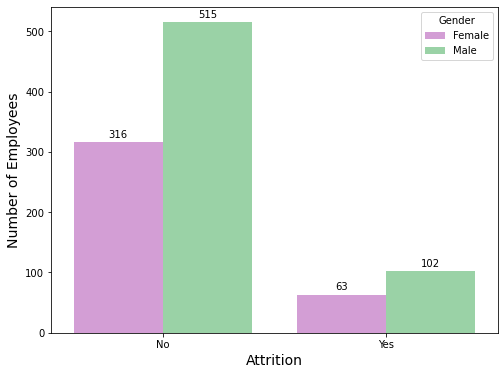

In [48]:
# Gender distribution based on Attrition

plt.figure(figsize=(8, 6)) 
plot = sns.countplot(x="Attrition", hue="Gender", data=general, palette =["#db95de", "#91dba1"]) 
plt.xlabel("Attrition", size=14)
plt.ylabel("Number of Employees", size=14)


for bar in plot.patches:
    plot.annotate(format(bar.get_height(), ".0f"), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 8), 
                   textcoords='offset points')

plt.show() 

<Figure size 576x432 with 0 Axes>

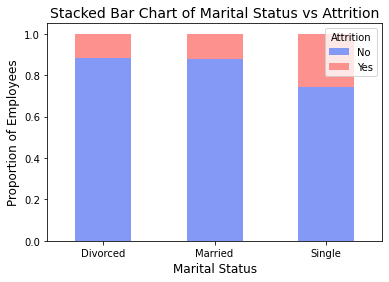

In [49]:
plt.figure(figsize=(8, 6)) 
table=pd.crosstab(general.MaritalStatus, general.Attrition,)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color =["#8499f5", "#fc918d"])
plt.title('Stacked Bar Chart of Marital Status vs Attrition', size = 14)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Marital Status', size = 12)
plt.ylabel('Proportion of Employees', size = 12)
plt.show()  

##### From the graph above we can see that there are some proportional differences in Attrition based on the Marital Status. Therefore, this feature might have a significant impact for Attrition and should be considered in further analysis. 

<Figure size 576x432 with 0 Axes>

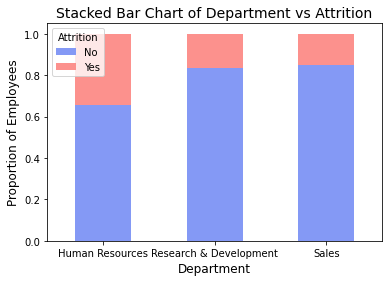

In [50]:
plt.figure(figsize=(8, 6)) 
table=pd.crosstab(general.Department, general.Attrition,)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color =["#8499f5", "#fc918d"])
plt.title('Stacked Bar Chart of Department vs Attrition', size = 14)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Department', size = 12)
plt.ylabel('Proportion of Employees', size = 12)
plt.show()  

##### From the graph above we can see that there are some proportional differences in Attrition based on the Department. Therefore, this feature might also have a significant impact for Attrition and should be considered in further analysis. 

<Figure size 576x432 with 0 Axes>

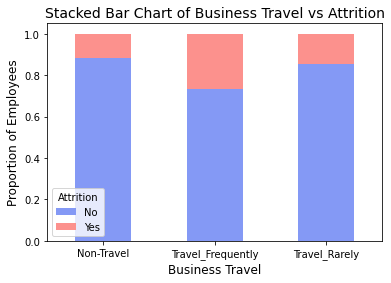

In [51]:
plt.figure(figsize=(8, 6)) 
table=pd.crosstab(general.BusinessTravel, general.Attrition,)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color =["#8499f5", "#fc918d"])
plt.title('Stacked Bar Chart of Business Travel vs Attrition', size = 14)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Business Travel', size = 12)
plt.ylabel('Proportion of Employees', size = 12)
plt.show() 

##### From the graph above we can see that there are some proportional differences in Attrition based on the Business Travel variable. Therefore, this feature might also have a significant impact for Attrition and should be considered in further analysis. 

<Figure size 576x432 with 0 Axes>

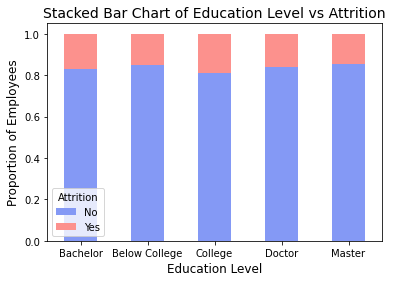

In [52]:
plt.figure(figsize=(8, 6)) 
table=pd.crosstab(general.Education, general.Attrition,)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color =["#8499f5", "#fc918d"])
plt.title('Stacked Bar Chart of Education Level vs Attrition', size = 14)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Education Level', size = 12)
plt.ylabel('Proportion of Employees', size = 12)
plt.show() 

<Figure size 576x432 with 0 Axes>

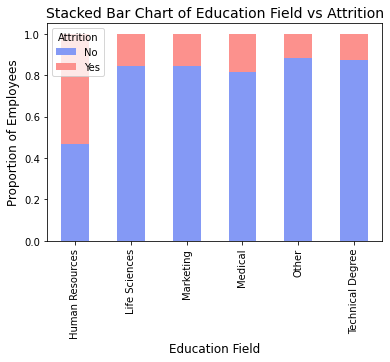

In [53]:
plt.figure(figsize=(8, 6)) 
table=pd.crosstab(general.EducationField, general.Attrition,)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color =["#8499f5", "#fc918d"])
plt.title('Stacked Bar Chart of Education Field vs Attrition', size = 14)
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Education Field', size = 12)
plt.ylabel('Proportion of Employees', size = 12)
plt.show() 

##### From the graph above we can see that the biggest proportion of the employees who left the company was with education in Human Resources Field. 

<Figure size 576x432 with 0 Axes>

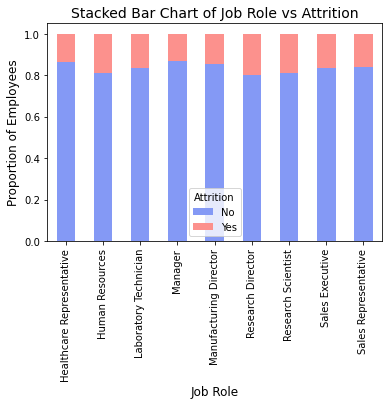

In [54]:
plt.figure(figsize=(8, 6)) 
table=pd.crosstab(general.JobRole, general.Attrition,)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color =["#8499f5", "#fc918d"])
plt.title('Stacked Bar Chart of Job Role vs Attrition', size = 14)
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Job Role', size = 12)
plt.ylabel('Proportion of Employees', size = 12)
plt.show() 

<Figure size 576x432 with 0 Axes>

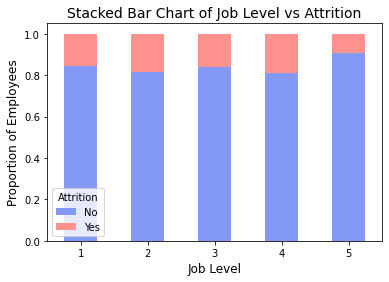

In [55]:
plt.figure(figsize=(8, 6)) 
table=pd.crosstab(general.JobLevel, general.Attrition,)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color =["#8499f5", "#fc918d"])
plt.title('Stacked Bar Chart of Job Level vs Attrition', size = 14)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Job Level', size = 12)
plt.ylabel('Proportion of Employees', size = 12)
plt.show() 

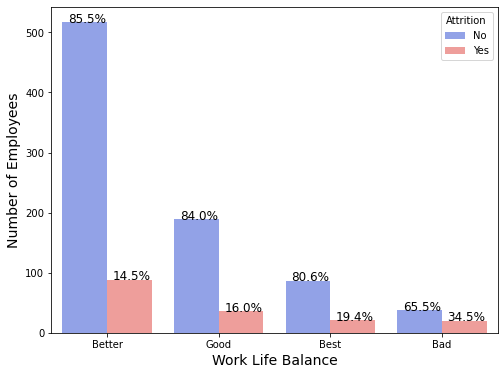

In [56]:
# Work Life Balance Levels distribution based on the Attrition
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            plot.annotate(percentage, (x, y), size = 12)
    plt.show() 
    
plt.figure(figsize=(8, 6)) 
plot = sns.countplot(x="WorkLifeBalance", order = data["WorkLifeBalance"].value_counts().index,  hue="Attrition", data=data, palette =["#8499f5", "#fc918d"]) 
plt.xlabel("Work Life Balance", size=14)
plt.ylabel("Number of Employees", size=14)


with_hue(plot, data.WorkLifeBalance, 4, 2)


##### From the graph above we can see that employees who think that Work Life Balance is Bad in the company tend to leave the company more than others. 

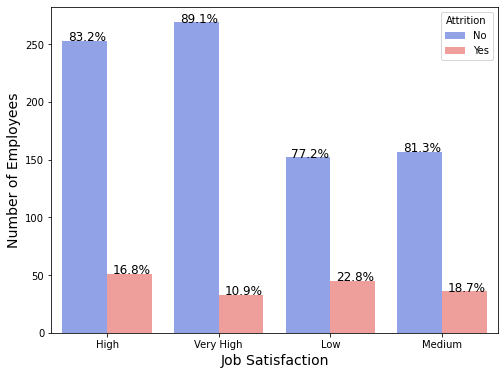

In [57]:
plt.figure(figsize=(8, 6)) 
plot = sns.countplot(x="JobSatisfaction", order = data["JobSatisfaction"].value_counts().index,  hue="Attrition", data=data, palette =["#8499f5", "#fc918d"]) 
plt.xlabel("Job Satisfaction", size=14)
plt.ylabel("Number of Employees", size=14)

with_hue(plot, data.JobSatisfaction, 4, 2)

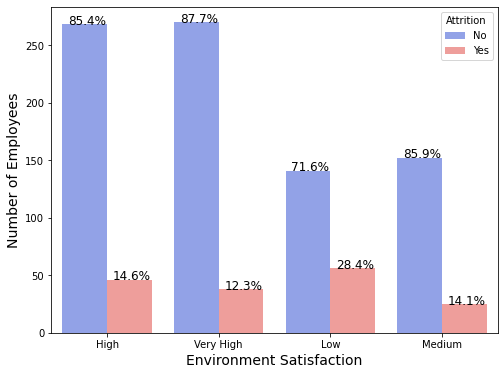

In [58]:
plt.figure(figsize=(8, 6)) 
plot = sns.countplot(x="EnvironmentSatisfaction", order = data["EnvironmentSatisfaction"].value_counts().index,  hue="Attrition", data=data, palette =["#8499f5", "#fc918d"]) 
plt.xlabel("Environment Satisfaction", size=14)
plt.ylabel("Number of Employees", size=14)

with_hue(plot, data.EnvironmentSatisfaction, 4, 2)

##### From the graph above we can see that employees whose Environment Satisfaction  is Low in the company tend to leave the company more than others. 

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

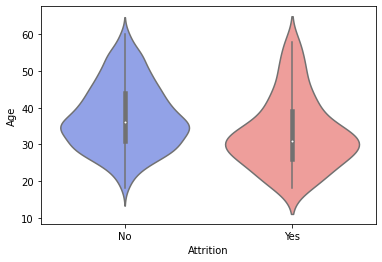

In [59]:
sns.violinplot(x="Attrition", y="Age", data=data, palette =["#8499f5", "#fc918d"])

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

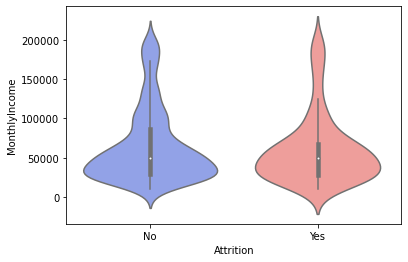

In [60]:
sns.violinplot(x="Attrition", y="MonthlyIncome", data=data, palette =["#8499f5", "#fc918d"])

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

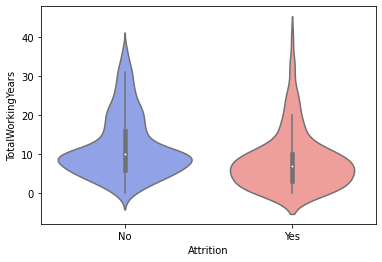

In [61]:
sns.violinplot(x="Attrition", y="TotalWorkingYears", data=data, palette =["#8499f5", "#fc918d"]) 

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

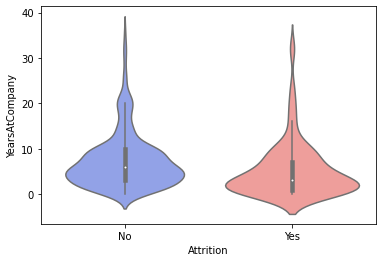

In [62]:
sns.violinplot(x="Attrition", y="YearsAtCompany", data=data, palette =["#8499f5", "#fc918d"]) 

<AxesSubplot:xlabel='Attrition', ylabel='AverageWorkingHours'>

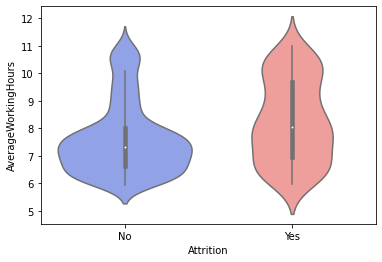

In [63]:
sns.violinplot(x="Attrition", y="AverageWorkingHours", data=data, palette =["#8499f5", "#fc918d"]) 

##### From the above graph we can see that there is a different distribution of average working hours between employees who have left the company and those who have stayed in the company. 

### Looking into a few more features 

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

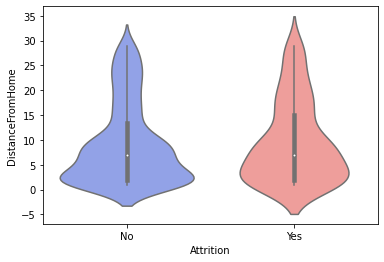

In [65]:
sns.violinplot(x="Attrition", y="DistanceFromHome", data=data, palette =["#8499f5", "#fc918d"])

<AxesSubplot:xlabel='Attrition', ylabel='NumCompaniesWorked'>

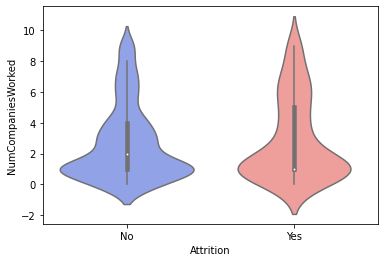

In [66]:
sns.violinplot(x="Attrition", y="NumCompaniesWorked", data=data, palette =["#8499f5", "#fc918d"])

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

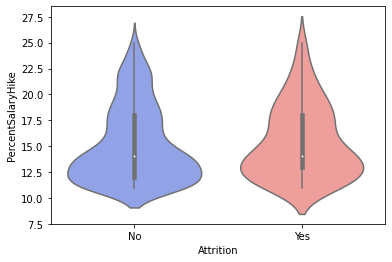

In [67]:
sns.violinplot(x="Attrition", y="PercentSalaryHike", data=data, palette =["#8499f5", "#fc918d"])

<AxesSubplot:xlabel='Attrition', ylabel='StockOptionLevel'>

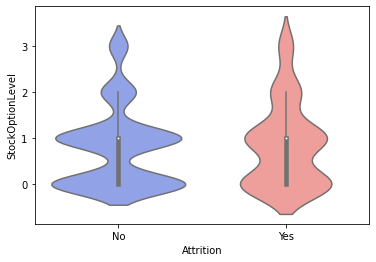

In [68]:
sns.violinplot(x="Attrition", y="StockOptionLevel", data=data, palette =["#8499f5", "#fc918d"])

<AxesSubplot:xlabel='Attrition', ylabel='TrainingTimesLastYear'>

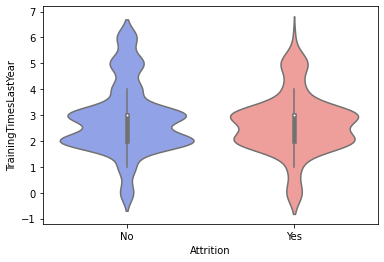

In [69]:
sns.violinplot(x="Attrition", y="TrainingTimesLastYear", data=data, palette =["#8499f5", "#fc918d"])

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

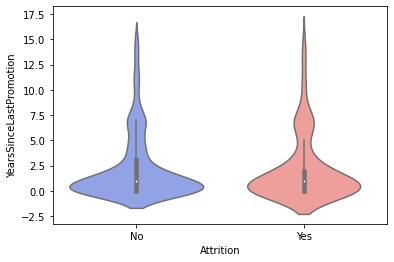

In [70]:
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", data=data, palette =["#8499f5", "#fc918d"])

<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

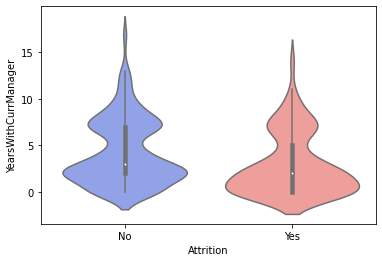

In [71]:
sns.violinplot(x="Attrition", y="YearsWithCurrManager", data=data, palette =["#8499f5", "#fc918d"])

## Looking into colinearity among predictor variables

In [72]:
data.drop(columns=["EmployeeID"], axis=1, inplace=True)

<AxesSubplot:>

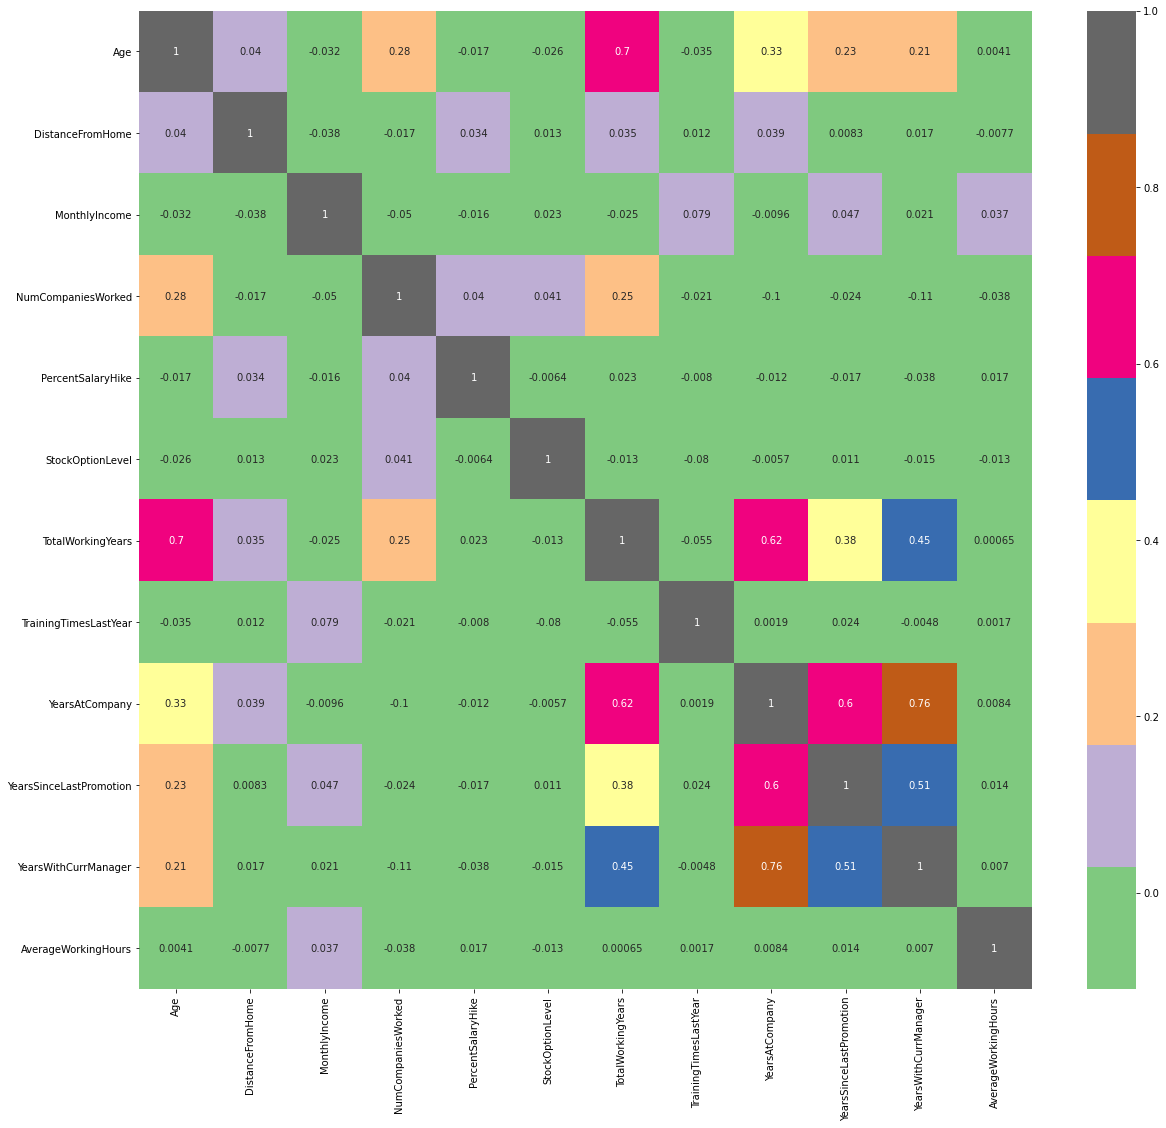

In [73]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), annot = True, cmap="Accent")

##### From the above Heat map we can see that some variables have quite high correlation coefficients. This should be taken into consideration in further analysis in order to eliminate posible colinearity among predictor variables. 

In [74]:
# Turning Attrition column data into categorical data, where 1 means that employee has left, 0 - employee did not leave. 
data["Attrition"] = data["Attrition"].replace({"Yes": 1, "No": 0})
data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AverageWorkingHours
0,51,0,Travel_Rarely,Sales,6,College,Life Sciences,Female,1,Healthcare Representative,...,0,1.0,6,1,0,0,High,Very High,Good,7.373651
1,31,1,Travel_Frequently,Research & Development,10,Below College,Life Sciences,Female,1,Research Scientist,...,1,6.0,3,5,1,4,High,Medium,Best,7.718969
2,32,0,Travel_Frequently,Research & Development,17,Master,Other,Male,4,Sales Executive,...,3,5.0,2,5,0,3,Medium,Medium,Bad,7.013240
3,38,0,Non-Travel,Research & Development,2,Doctor,Life Sciences,Male,3,Human Resources,...,3,13.0,5,8,7,5,Very High,Very High,Better,7.193678
4,32,0,Travel_Rarely,Research & Development,10,Below College,Medical,Male,1,Sales Executive,...,2,9.0,2,6,0,4,Very High,Low,Better,8.006175


In [75]:
# Creating a dummy variables for categorical variables and dropping the first one
dummy_variables = pd.get_dummies(data[["BusinessTravel", "Department", "Education","EducationField", "Gender", "JobLevel", 
                                       "JobRole", "MaritalStatus", "EnvironmentSatisfaction", "JobSatisfaction", 
                                       "WorkLifeBalance"]], drop_first=True)
# Adding the results to the dataframe
data = pd.concat([data, dummy_variables], axis=1)

In [76]:
# Dropping duplicate variables which now have been converted to dummy variables
data.drop(columns=["BusinessTravel", "Department", "Education","EducationField", "Gender", "JobLevel", "JobRole", 
                   "MaritalStatus", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"], axis=1, inplace=True)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 995
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                996 non-null    int64  
 1   Attrition                          996 non-null    int64  
 2   DistanceFromHome                   996 non-null    int64  
 3   MonthlyIncome                      996 non-null    int64  
 4   NumCompaniesWorked                 996 non-null    float64
 5   PercentSalaryHike                  996 non-null    int64  
 6   StockOptionLevel                   996 non-null    int64  
 7   TotalWorkingYears                  996 non-null    float64
 8   TrainingTimesLastYear              996 non-null    int64  
 9   YearsAtCompany                     996 non-null    int64  
 10  YearsSinceLastPromotion            996 non-null    int64  
 11  YearsWithCurrManager               996 non-null    int64  

#### Calculating VIF in order to eliminate variables with high colinearity

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
x = add_constant(data.drop(["Attrition"], axis=1))

In [83]:
vif_data = pd.DataFrame() 
vif_data["Variable"] = x.columns 

In [84]:
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 

In [85]:
print(vif_data.loc[vif_data["VIF"]> 5])

                             Variable         VIF
0                               const  212.492690
15  Department_Research & Development   12.049937
16                   Department_Sales   12.160061
21       EducationField_Life Sciences   29.716364
22           EducationField_Marketing   13.911280
23             EducationField_Medical   26.587414
24               EducationField_Other    7.009478
25    EducationField_Technical Degree   10.493931


In [86]:
# Dropping variable with the biggest VIF ("EducationField_Life Sciences") and checking again
x = x.drop(["EducationField_Life Sciences"], axis=1)

vif_data = pd.DataFrame() 
vif_data["Variable"] = x.columns 

vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
print(vif_data.loc[vif_data["VIF"]> 5])

                             Variable         VIF
0                               const  170.054599
15  Department_Research & Development    7.105629
16                   Department_Sales    7.486013


In [87]:
# Dropping variable with the biggest VIF ("Department_Sales") and checking again
x = x.drop(["Department_Sales"], axis=1)

vif_data = pd.DataFrame() 
vif_data["Variable"] = x.columns 

vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
print(vif_data.loc[vif_data["VIF"]> 5])

  Variable         VIF
0    const  142.789293


##### Now all remaining variables have VIF lower than 5. We can carry on with the Logit regression model. 

## Logistic Regression Analysis

In [88]:
# Importing additional packages and classes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
# Setting dependent/independent variables
X = x.drop(["const"], axis=1)
y = data["Attrition"]

In [90]:
model=sm.Logit(y,X)
model.fit()
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.337461
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.337461
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  996
Model:                          Logit   Df Residuals:                      949
Method:                           MLE   Df Model:                           46
Date:                Mon, 29 Mar 2021   Pseudo R-squ.:                  0.2483
Time:                        19:15:53   Log-Likelihood:                -336.11
converged:                       True   LL-Null:                       -447.15
Covariance Type:            nonrobust   LLR p-value:                 6.641e-25
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0637      0.015     -4.119      0.000      -0.094      -0.033
DistanceFromHome                      0.0151      0.013      1.200      0.230      -0.010       0.040
MonthlyIncome                     -5.164e-06   2.28e-06     -2.261      0.024   -9.64e-06   -6.88e-07
NumCompaniesWorked                    0.1347      0.043      3.097      0.002       0.049       0.220
PercentSalaryHike                    -0.0312      0.026     -1.187      0.235      -0.083       0.020
StockOptionLevel                     -0.0519      0.119     -0.438      0.662      -0.285       0.181
TotalWorkingYears                    -0.0621      0.028     -2.185      0.029      -0.118      -0.006
TrainingTimesLastYear                -0.1942      0.078     -2.476      0.013      -0.348      -0.040
YearsAtCompany                        0.0213      0.041      0.525      0.600      -0.058       0.101
YearsSinceLastPromotion               0.2134      0.047      4.513      0.000       0.121       0.306
YearsWithCurrManager                 -0.1914      0.051     -3.783      0.000      -0.291      -0.092
AverageWorkingHours                   0.4062      0.067      6.087      0.000       0.275       0.537
BusinessTravel_Travel_Frequently      0.9617      0.373      2.578      0.010       0.231       1.693
BusinessTravel_Travel_Rarely         -0.0008      0.338     -0.002      0.998      -0.664       0.662
Department_Research & Development    -0.3026      0.242     -1.251      0.211      -0.777       0.171
Education_Below College              -0.0471      0.363     -0.130      0.897      -0.758       0.664
Education_College                     0.1509      0.276      0.547      0.585      -0.390       0.692
Education_Doctor                     -0.4630      0.596     -0.776      0.438      -1.632       0.706
Education_Master                     -0.2736      0.255     -1.072      0.284      -0.774       0.227
EducationField_Marketing             -0.6009      0.382     -1.573      0.116      -1.350       0.148
EducationField_Medical                0.0564      0.233      0.242      0.809      -0.400       0.513
EducationField_Other                 -0.4600      0.526     -0.874      0.382      -1.491       0.571
EducationField_Technical Degree      -0.3371      0.402     -0.838      0.402      -1.126       0.451
Gender_Male                          -0.0395      0.209     -0.189      0.850      -0.449       0.370
JobLevel_2                            0.2823      0.237      1.190      0.234      -0.183       0.747
JobLevel_3                            0.2413      0.315      0.766      0.444      -0.376       0.859
JobLevel_4                            0.5750      0.413      1.392      0.164      -0.235       1.385
JobLevel_5                           -0.6427      0.649     -0.991      0.322      -1.914       0.628
JobRole_Human Resources               0.2391      0.610      0.392      0.695  

In [91]:
# Keeping features with P < 0.05
X = data[["Age"] + ["MonthlyIncome"]+ ["NumCompaniesWorked"]+ ["TotalWorkingYears"]+ ["TrainingTimesLastYear"] +
            ["YearsSinceLastPromotion"]+ ["YearsWithCurrManager"]+ ["AverageWorkingHours"] +
            ["BusinessTravel_Travel_Frequently"]+ ["MaritalStatus_Single"]+ ["EnvironmentSatisfaction_Low"]+ 
           ["JobSatisfaction_Very High"]+ ["WorkLifeBalance_Best"]+["WorkLifeBalance_Better"]+ ["WorkLifeBalance_Good"]]

In [92]:
# Running model again with remaining features
model=sm.Logit(y,X)
model.fit()
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.350722
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.350722
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  996
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                           14
Date:                Mon, 29 Mar 2021   Pseudo R-squ.:                  0.2188
Time:                        19:16:14   Log-Likelihood:                -349.32
converged:                       True   LL-Null:                       -447.15
Covariance Type:            nonrobust   LLR p-value:                 4.237e-34
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.0675      0.014     -4.799      0.000      -0.095      -0.040
MonthlyIncome                    -4.842e-06   2.16e-06     -2.237      0.025   -9.08e-06      -6e-07
NumCompaniesWorked                   0.1189      0.040      2.954      0.003       0.040       0.198
TotalWorkingYears                   -0.0436      0.023     -1.874      0.061      -0.089       0.002
TrainingTimesLastYear               -0.1960      0.074     -2.644      0.008      -0.341      -0.051
YearsSinceLastPromotion              0.1941      0.040      4.834      0.000       0.115       0.273
YearsWithCurrManager                -0.1596      0.041     -3.891      0.000      -0.240      -0.079
AverageWorkingHours                  0.3378      0.056      6.062      0.000       0.229       0.447
BusinessTravel_Travel_Frequently     0.9011      0.221      4.069      0.000       0.467       1.335
MaritalStatus_Single                 0.8499      0.197      4.312      0.000       0.464       1.236
EnvironmentSatisfaction_Low          1.0189      0.219      4.662      0.000       0.591       1.447
JobSatisfaction_Very High           -0.9688      0.238     -4.076      0.000      -1.435      -0.503
WorkLifeBalance_Best                -1.2976      0.401     -3.233      0.001      -2.084      -0.511
WorkLifeBalance_Better              -1.6173      0.319     -5.067      0.000      -2.243      -0.992
WorkLifeBalance_Good                -1.2759      0.353     -3.614      0.000      -1.968      -0.584
====================================================================================================
"""

In [93]:
# Again, keeping features with P < 0.05
X = data[["Age"] + ["MonthlyIncome"]+ ["NumCompaniesWorked"]+ ["TrainingTimesLastYear"] +
            ["YearsSinceLastPromotion"]+ ["YearsWithCurrManager"]+ ["AverageWorkingHours"] +
            ["BusinessTravel_Travel_Frequently"]+ ["MaritalStatus_Single"]+ ["EnvironmentSatisfaction_Low"]+ 
           ["JobSatisfaction_Very High"]+ ["WorkLifeBalance_Best"]+["WorkLifeBalance_Better"]+ ["WorkLifeBalance_Good"]]

In [94]:
# Running model again with remaining features
model=sm.Logit(y,X)
model.fit()
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.352558
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.352558
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  996
Model:                          Logit   Df Residuals:                      982
Method:                           MLE   Df Model:                           13
Date:                Mon, 29 Mar 2021   Pseudo R-squ.:                  0.2147
Time:                        19:16:41   Log-Likelihood:                -351.15
converged:                       True   LL-Null:                       -447.15
Covariance Type:            nonrobust   LLR p-value:                 5.984e-34
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.0833      0.012     -7.109      0.000      -0.106      -0.060
MonthlyIncome                    -4.694e-06   2.16e-06     -2.174      0.030   -8.93e-06   -4.63e-07
NumCompaniesWorked                   0.1040      0.040      2.627      0.009       0.026       0.182
TrainingTimesLastYear               -0.1776      0.073     -2.425      0.015      -0.321      -0.034
YearsSinceLastPromotion              0.1727      0.037      4.605      0.000       0.099       0.246
YearsWithCurrManager                -0.1796      0.039     -4.621      0.000      -0.256      -0.103
AverageWorkingHours                  0.3578      0.055      6.540      0.000       0.251       0.465
BusinessTravel_Travel_Frequently     0.8939      0.221      4.049      0.000       0.461       1.327
MaritalStatus_Single                 0.8608      0.196      4.383      0.000       0.476       1.246
EnvironmentSatisfaction_Low          1.0046      0.217      4.624      0.000       0.579       1.431
JobSatisfaction_Very High           -0.9640      0.236     -4.078      0.000      -1.427      -0.501
WorkLifeBalance_Best                -1.2157      0.397     -3.060      0.002      -1.994      -0.437
WorkLifeBalance_Better              -1.5472      0.317     -4.884      0.000      -2.168      -0.926
WorkLifeBalance_Good                -1.2132      0.351     -3.456      0.001      -1.901      -0.525
====================================================================================================
"""

##### Now all variables have P values lower than 0.05. We can run Logistic Regression.

In [95]:
# Splitting variables for model's training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [97]:
# Training model
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train, y_train) 

LogisticRegression()

In [98]:
# Testing the model
y_pred = model2.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [99]:
# Checking model's accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8232931726907631

In [101]:
# Predicting values with the trained model
y_pred_final = pd.DataFrame({"Attrition": y_test.values, "Pred_Attrition": y_pred})
y_pred_final["EmployeeID"] = y_test.index
y_pred_final

,Attrition,Pred_Attrition,EmployeeID
0,0,0,983
1,0,0,724
2,0,0,31
3,1,0,995
4,0,0,864
...,...,...,...
244,0,0,75
245,0,0,452
246,1,0,924
247,0,0,249


In [102]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[205,   1],
       [ 43,   0]], dtype=int64)

##### Confusion matrix above shows that constructed model has predicted Attririon - No values  205 correctly, 1 incorrectly and predicted Attrition - Yes values 43 incorrectly and 0 correctly. 

In [103]:
# When model is defined, we can check probabilities that the predicted output is equal to zero or one.
y_pred_prob = model2.predict_proba(X_test)

In [104]:
y_pred_prob

array([[0.70670146, 0.29329854],
       [0.86041891, 0.13958109],
       [0.7868966 , 0.2131034 ],
       [0.82238056, 0.17761944],
       [0.81196763, 0.18803237],
       [0.97415364, 0.02584636],
       [0.89704613, 0.10295387],
       [0.6308848 , 0.3691152 ],
       [0.70011154, 0.29988846],
       [0.86330533, 0.13669467],
       [0.9928142 , 0.0071858 ],
       [0.97177402, 0.02822598],
       [0.93507786, 0.06492214],
       [0.72785488, 0.27214512],
       [0.9859514 , 0.0140486 ],
       [0.99061516, 0.00938484],
       [0.95839366, 0.04160634],
       [0.95457086, 0.04542914],
       [0.86567551, 0.13432449],
       [0.84062129, 0.15937871],
       [0.84545044, 0.15454956],
       [0.77021697, 0.22978303],
       [0.80946845, 0.19053155],
       [0.93313826, 0.06686174],
       [0.58695647, 0.41304353],
       [0.8915231 , 0.1084769 ],
       [0.68121805, 0.31878195],
       [0.86246917, 0.13753083],
       [0.82397008, 0.17602992],
       [0.85706163, 0.14293837],
       [0.

##### In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero. The second column is the probability that the output is one. This way we can get probabilities of employees' Attrition. 

In [119]:
prob = pd.DataFrame(y_pred_prob)
prob["EmployeeID"] = X_test.index
prob

,0,1,EmployeeID
0,0.706701,0.293299,983
1,0.860419,0.139581,724
2,0.786897,0.213103,31
3,0.822381,0.177619,995
4,0.811968,0.188032,864
...,...,...,...
244,0.963928,0.036072,75
245,0.887718,0.112282,452
246,0.884442,0.115558,924
247,0.912545,0.087455,249


From the analysis above we can see that there are quite a few factors which might have an impact on employees' attrition. Therefore, organization could look into these factors:
1. Age: younger employees have a higher risk of attrition. 
2. Monthly Income: employees with lower monthly income have a higher risk of attrition 
3. Number Companies Worked: employees who worked in more different companies have a tendency to leave. 
4. Training Times Last Year:employees with longer training hours have lower risk of attrition.
5. Years Since Last Promotion : employees who did not get promotion for the last 5 years have higher risk of attrition.
6. Years With Current Manager : longer years with the same manager reduces the risk of attrition.
7. Average Working Hours: longer average working hours are increasing the risk of attrition. 
8. Business Travel : employees who are traveling frequently are at a higher risk of attrition.
9. Marital Status : employees with marital status single are at a higher risk of attrition.
10. Environment Satisfaction : employees with Low Environment Satisfaction are at a higher risk of attrition.
11. Job Satisfaction : employees with very high Job Satisfaction have lower risk of attrition.
12. Work Life Balance : the better Work Life Balance level the lower risk of attrition.

By looking into these factors organization could make some decisions and organizational changes in order to improve the overall environment and this way reduce the attrition rate in the company. 